## **Part 1 — Dataset Setup & Exploratory Data Analysis (EDA)**

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

train_dir = "./archive (1)/train"
os.listdir(train_dir)

['lacrosse',
 'shuffleboard',
 'arm wrestling',
 'golf',
 'surfing',
 'snow boarding',
 'parallel bar',
 'pole climbing',
 'giant slalom',
 'bobsled',
 'baton twirling',
 'weightlifting',
 'hydroplane racing',
 'barell racing',
 'water cycling',
 'mushing',
 'uneven bars',
 'pole vault',
 'roller derby',
 'rowing',
 'jousting',
 'air hockey',
 'sky surfing',
 'shot put',
 'sidecar racing',
 'field hockey',
 'harness racing',
 'disc golf',
 'canoe slamon',
 'football',
 'ski jumping',
 'ice yachting',
 'cricket',
 'figure skating women',
 'horse racing',
 'baseball',
 'billiards',
 'bowling',
 'motorcycle racing',
 'javelin',
 'fly fishing',
 'bull riding',
 'sumo wrestling',
 'tug of war',
 'figure skating men',
 'sailboat racing',
 'horse jumping',
 'basketball',
 'cheerleading',
 'frisbee',
 'high jump',
 'water polo',
 'polo',
 'rock climbing',
 'rollerblade racing',
 'figure skating pairs',
 'balance beam',
 'formula 1 racing',
 'volleyball',
 'hang gliding',
 'ultimate',
 'croquet

In [2]:
selected_classes = [
    "air hockey",
    "baseball",
    "basketball",
    "bowling",
    "boxing",
    "cricket",
    "field hockey",
    "football",
    "swimming",
    "tennis"
]


In [3]:
classes = selected_classes

images = []
labels = []

for label_idx, sport in enumerate(classes):
    sport_folder = os.path.join(train_dir, sport)
    if not os.path.isdir(sport_folder):
        print(f"Warning: {sport} not found, skipping...")
        continue
    
    for file in os.listdir(sport_folder):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(sport_folder, file)
            try:
                img = Image.open(img_path).convert("RGB")
                images.append(np.array(img))
                labels.append(label_idx)
            except:
                print("Error loading:", img_path)

len(images), len(labels)


(1456, 1456)

**Example images from a class:**

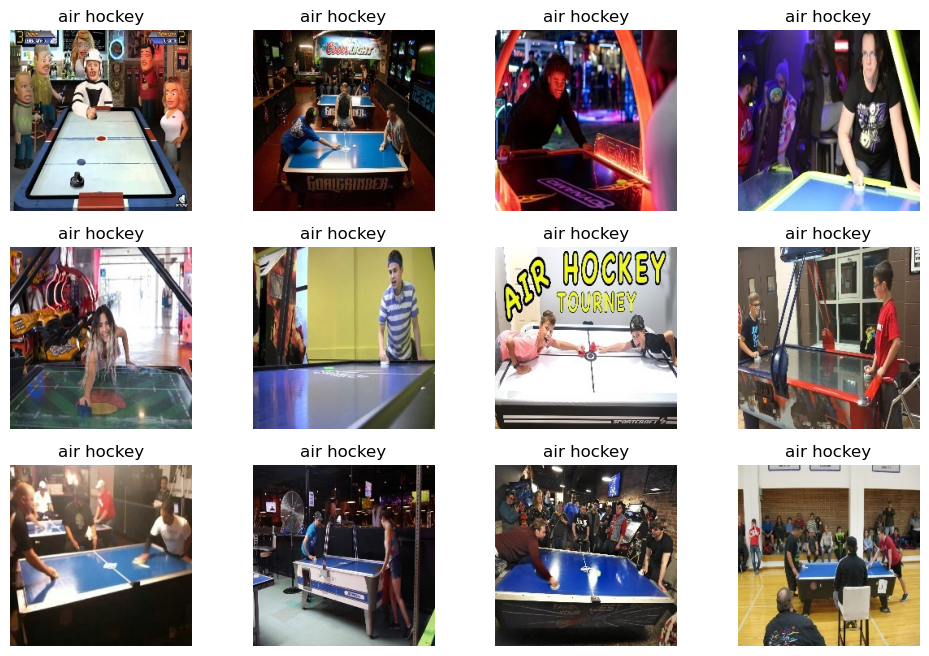

In [4]:
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis("off")

plt.show()


**Image size distribution:**

In [5]:
sizes = [img.shape[:2] for img in images]
unique_sizes = set(sizes)

print("Number of unique image sizes:", len(unique_sizes))
print("Some example sizes:", list(unique_sizes)[:10])


Number of unique image sizes: 1
Some example sizes: [(224, 224)]


**Class distribution plot:**

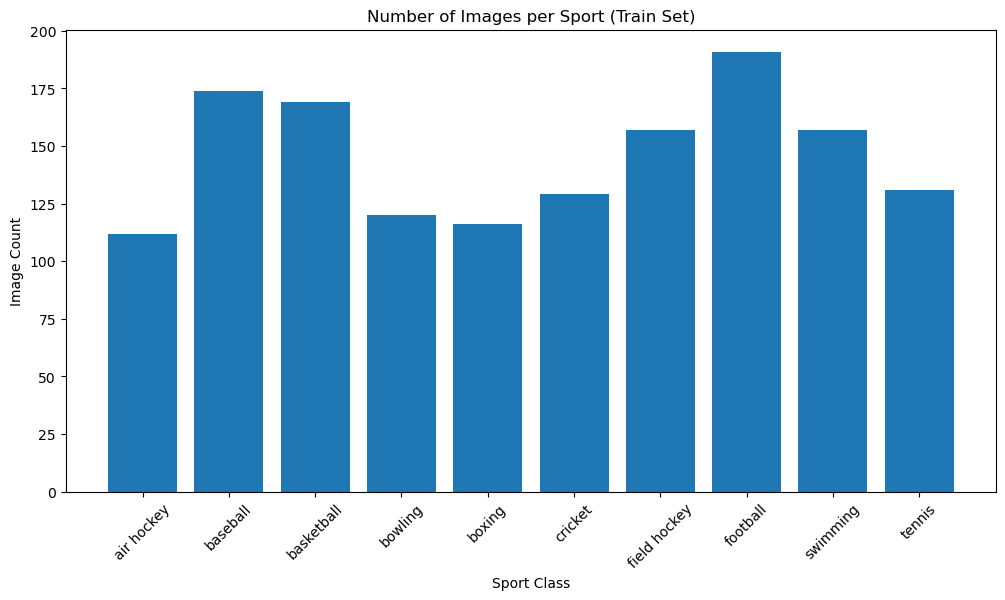

In [6]:
from collections import Counter

count = Counter(labels)

plt.figure(figsize=(12, 6))
plt.bar(classes, [count[i] for i in range(len(classes))])
plt.title("Number of Images per Sport (Train Set)")
plt.xticks(rotation=45)
plt.xlabel("Sport Class")
plt.ylabel("Image Count")
plt.show()


### **Dataset Overview**
We selected 10 sports categories from the full 100-class Kaggle Sports Classification dataset to create a manageable, balanced, and diverse subset:

- air hockey  
- baseball  
- basketball  
- bowling  
- boxing  
- cricket  
- field hockey  
- football  
- swimming  
- tennis  

Our selection intentionally mixes:
- Easy, highly recognizable sports: football, basketball, baseball
- Medium-difficulty sports: cricket, bowling, swimming
- Harder, more visually varied sports: air hockey, field hockey

This helps us later evaluate how PCA and CNNs handle differences in visual complexity.

---

### **Image Loading & Dataset Size**

To prepare the dataset for analysis, we implemented an image extraction pipeline using Python. This process transforms raw image files into numerical data that can be used for PCA-based feature extraction and CNN training.

We began by identifying the directory structure of the dataset and iterating through each selected class folder. For every image file, we:

1. Loaded the image using the PIL library and converted it to RGB format to ensure consistency.
2. Converted the image into a NumPy array representing its pixel values.
3. Assigned a numeric label based on the sport category.
4. Stored both the arrays and labels in Python lists for later preprocessing and modeling.

We loaded all images from the `/train` directory for these 10 classes.

Results:
- **1456 total images**
- **10 classes**
- Labels distributed roughly evenly (each class ~110–190 images)

Because all images were already formatted at 224×224 resolution, the dataset required no additional resizing at this stage, simplifying preprocessing. This is sufficiently balanced for both PCA and CNN modeling.

---

### **Example Images**
We displayed grid samples for each class to visually inspect the dataset.

Observations:
- Images are clean and correctly labeled.
- Air hockey images vary widely (arcade settings, overhead views, multiple players).
- Sports like basketball and football have strong, consistent visual cues.
- This variation will influence model performance — CNNs should generalize better than PCA.

---

### **Class Distribution**
The bar plot shows that all 10 classes have a comparable number of images, with no extreme imbalance.

A balanced dataset is important for:
- Fair model evaluation  
- Preventing bias toward classes with more samples  

---

### **Image Size Distribution**

Surprisingly, all images share one single resolution:

- **Unique image sizes:** 1  
- **Image dimensions:** `(224, 224)`

This is ideal because no resizing is needed before PCA or CNN, all images are already standardized, and the dataset is cleaner than most real-world image collections  

---

### **Key Takeaways from EDA**
- The dataset is clean, consistent, and balanced across the selected 10 classes.
- All images are already standardized to 224×224, simplifying preprocessing.
- Visual samples show noticeable variation in complexity between sports.
- You have a strong foundation for the next steps: feature extraction (PCA) and modeling (CNN).

---

### **Conclusion**
Part 1 successfully confirms that our dataset is ready for modeling.  
We understand the structure, size, balance, and visual nature of the images, and our 10-class subset is appropriate for comparing PCA vs CNN performance.